In [9]:
import autograd.numpy as np
from autograd import grad
import nlopt, numpy as npf
import matplotlib.pyplot as plt

import sys
sys.path.append('../')

import use_autograd
use_autograd.use = 1
import rcwa
from utils import test_grad

In [10]:
t = 100e-9
Period = 2e-6

c0 = 299792458
rho = 2.329e3
mp = 1e-4;
I = 1e10;
A = 10
vf = 0.2*c0
lam0 = 1.2e-6

N = 20
v = np.linspace(0,vf,N)
freq_list = np.sqrt((c0-v)/(c0+v))
gamma = 1./np.sqrt(1-(v/c0)**2)

Nx = 50
Ny = 50

In [11]:
nG = 101
# lattice vector
Lx = Period/lam0
Ly = Period/lam0
L1 = [Lx,0.]
L2 = [0.,Ly]

# planewave excitation
p_amp = 0.
s_amp = 1.
p_phase = 0.
s_phase = 0.
# frequency and angles
theta = 0.
phi = 0.

# now consider three layers: vacuum + patterned + vacuum
epsuniform1 = 1.
epsdiff = 11.3
epsbkg = 1
epsuniform3 = 1.

thick1 = 1.
thick2 = t/lam0
thick3 = 1.

In [12]:
ctrl = 0
vec = []
def fun_Distance(dof,Qabs):
    mT = mp + t*A*rho*np.mean(dof)

    R = np.array([])
    for freq in freq_list:
        freqcmp = freq*(1+1j/2/Qabs)
        obj = rcwa.RCWA_obj(nG,L1,L2,freqcmp,theta,phi,verbose=0)
        obj.Add_LayerUniform(thick1,epsuniform1)
        obj.Add_LayerGrid(thick2,epsdiff,epsbkg,Nx,Ny)
        obj.Add_LayerUniform(thick3,epsuniform3)
        obj.Init_Setup(Gmethod=0)

        obj.MakeExcitationPlanewave(p_amp,p_phase,s_amp,s_phase,order = 0)
        obj.GridLayer_getDOF(dof)
        Rtmp,_ = obj.RT_Solve()

        R = np.append(R,Rtmp)

    integrand = mT/R*gamma*v/(1-v/c0)**2
    #D = c0/2/I/A*np.trapz(integrand,x=v)/1e9
    D = c0/2/I/A*(np.sum(integrand)-integrand[0]/2-integrand[-1]/2)*(v[1]-v[0])/1e9

    if 'autograd' not in str(type(D)):
        global ctrl
        global vec
        vec = npf.copy(dof)
        
        print ctrl,np.mean(R),D
        if npf.mod(ctrl,10)==0:
            plt.figure();
            plt.imshow(np.reshape(dof,(Nx,Ny)))
            plt.colorbar()
            plt.show()
            
        ctrl +=1
    return D

# Qabs = 20

0 0.3706658747072707 12.615953097748394


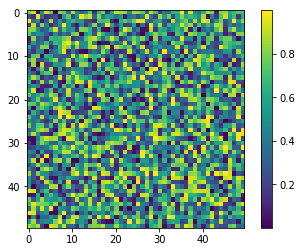

1 0.3704911673699646 12.613387750191658
2 0.36873422791314353 12.591057456273342
3 0.3458201833835336 12.454350076446522
4 0.2625159253947472 13.166238405833427
5 0.32351591371699373 12.624221165035827
6 0.34190488359833454 12.400455698349719
7 0.33862025977202226 12.337263334647814
8 0.32428448942659 11.492667464717213
9 0.3739963232058395 8.311095898065835
10 0.4424255772162307 7.351492326448732


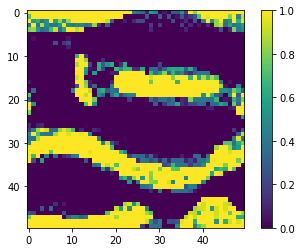

11 0.46791082277991336 6.705125622674937
12 0.4969270452738911 6.254684776839693
13 0.4861583515369837 6.003290736597593
14 0.4994697779539252 5.900641207458416
15 0.49637742547233366 5.807643639834027
16 0.49888859261084695 5.710633362129808
17 0.45228248747415567 5.9747548688714955
18 0.4806980097245286 5.725587834191693
19 0.49484678860317566 5.667048231684999
20 0.497976057047247 5.555369308852816


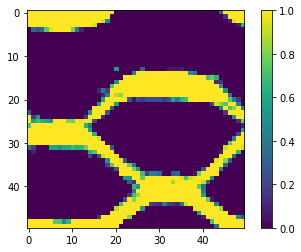

21 0.4784863874102413 5.475013591728734
22 0.49322867199188625 5.463985654690959
23 0.4149031759704392 6.006332388877426
24 0.491512153585915 5.335490977535856
25 0.49118896595222716 5.1244858563078655
26 0.4826526482287493 4.864059773851295
27 0.5031842421129312 4.615540157550683
28 0.21459558442125276 8.743084267041638
29 0.2745995517462693 7.361587902794118
30 0.4145246784097151 5.227467646109091


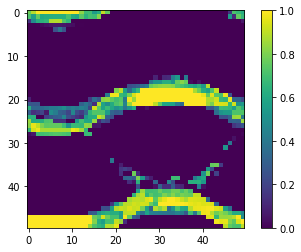

31 0.49586463739878817 4.550940846782352
32 0.5014266540976713 4.483999682044928
33 0.47657143977052846 4.486923870080988
34 0.4958504268340828 4.410777674144956
35 0.5035059967667748 4.243077449273662
36 0.44582977688784176 4.467398599609365
37 0.48176853307399015 4.186160803291087
38 0.5125101093095046 4.077579638079075
39 0.5008139812528035 4.039681197957659
40 0.5081904813565031 3.9941618116087243


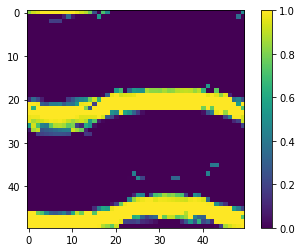

41 0.5063290000413614 3.975910317785344
42 0.5029505573659272 3.9209130700041297
43 0.507007170339963 3.838525809929636
44 0.5007302331551409 3.807233009454126
45 0.5008959031961078 3.896487256685829
46 0.5081586729686942 3.7803223692297014
47 0.5084081254040298 3.760064701069288
48 0.5081475425360911 3.7528051041385027
49 0.5079557915783777 3.735492945982331
50 0.5001503776609972 3.743733834906925


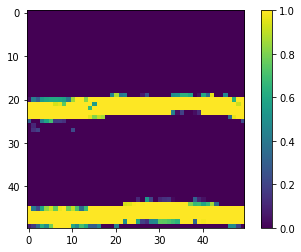

51 0.504826303906745 3.7260646447844747
52 0.5100485452584056 3.715498539707435
53 0.5048119042689425 3.7127945080855436
54 0.5090169174704455 3.7029446246770097
55 0.508382622589558 3.700926514093647
56 0.5062630838063512 3.6961249537010086
57 0.5102607909814356 3.7065110636129446
58 0.5093919353411005 3.6957297057154603
59 0.5064118202915358 3.6921155959029424
60 0.5075331634078178 3.6903066237394095


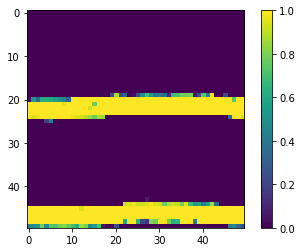

61 0.5051509351779346 3.688092779759605


KeyboardInterrupt: 

In [13]:
Qabs = 20.
fun = lambda dof: fun_Distance(dof,Qabs)
grad_fun = grad(fun)
def fun_nlopt(dof,gradn):
    gradn[:] = grad_fun(dof)
    return fun(dof)

ndof = Nx*Ny
#init = np.ones(ndof)
init = np.random.random(ndof)
lb=np.zeros(ndof,dtype=float)
ub=np.ones(ndof,dtype=float)

opt = nlopt.opt(nlopt.LD_MMA, ndof)
opt.set_lower_bounds(lb)
opt.set_upper_bounds(ub)

opt.set_xtol_rel(1e-5)
opt.set_maxeval(100)

opt.set_min_objective(fun_nlopt)
x = opt.optimize(init)

# Qabs = 100

62 0.7620533054793942 2.5101445880300184
63 0.762060651693562 2.510132315444159
64 0.7621333771683181 2.5100116126387007
65 0.7630650891519171 2.508595372335055
66 0.768219865855851 2.5059366505819534
67 0.7650605327222371 2.503465190806104
68 0.7693451839536328 2.505114959204478
69 0.7672092481634871 2.502212501778032
70 0.7560278410769694 2.511515818647859


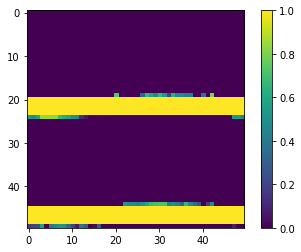

71 0.7647219488755308 2.5011702245911698
72 0.7670008645621256 2.5005869324755974
73 0.765519013059546 2.5001241781420855
74 0.7656989165716424 2.500058195164734
75 0.765407612431521 2.500029280371394
76 0.7650716668864372 2.5000842867196615
77 0.7652816194665351 2.499946758205533
78 0.7675603289041357 2.5009183003133146
79 0.7655980736416377 2.4999324272828374
80 0.7654303204095394 2.4999262936663955


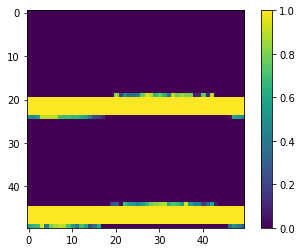

81 0.765511803507256 2.4999233967533967
82 0.7654176635829862 2.499918946360846
83 0.7659755073857158 2.49999334743186
84 0.7655068262937654 2.4999156699236114
85 0.7655526692334664 2.4999139211822925
86 0.765533381254677 2.4999226284485565


KeyboardInterrupt: 

In [14]:
Qabs = 100.
fun = lambda dof: fun_Distance(dof,Qabs)
grad_fun = grad(fun)
def fun_nlopt(dof,gradn):
    gradn[:] = grad_fun(dof)
    return fun(dof)

ndof = Nx*Ny
#init = np.ones(ndof)
init = npf.copy(vec)
lb=np.zeros(ndof,dtype=float)
ub=np.ones(ndof,dtype=float)

opt = nlopt.opt(nlopt.LD_MMA, ndof)
opt.set_lower_bounds(lb)
opt.set_upper_bounds(ub)

opt.set_xtol_rel(1e-5)
opt.set_maxeval(100)

opt.set_min_objective(fun_nlopt)
x = opt.optimize(init)

# Qabs = 1000

87 0.8424028766345147 2.287140563552145
88 0.842403623355762 2.2871403623086857
89 0.8424110736059378 2.287138365272496
90 0.8425156358574537 2.2871124348705174


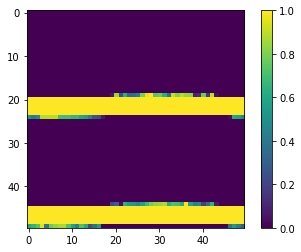

91 0.8436021408360214 2.2870972109038332
92 0.8431035596559531 2.2870353596850364
93 0.8430357773724602 2.287034474034648
94 0.843367167799604 2.2870529695247437
95 0.8431369827555022 2.287029062419446
96 0.8426083057362357 2.287096859775898
97 0.843072368736293 2.287027009387371
98 0.8435816902314659 2.2870754619465017
99 0.8431343654841079 2.287025730631038
100 0.842803002208162 2.2870449294907442


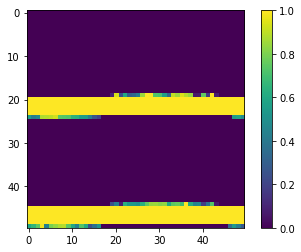

101 0.8430814204417272 2.287024539351069
102 0.8436081472136859 2.287086218381647
103 0.8431614042838765 2.287023900270179


KeyboardInterrupt: 

In [15]:
Qabs = 1000
fun = lambda dof: fun_Distance(dof,Qabs)
grad_fun = grad(fun)
def fun_nlopt(dof,gradn):
    gradn[:] = grad_fun(dof)
    return fun(dof)

ndof = Nx*Ny
#init = np.ones(ndof)
init = npf.copy(vec)
lb=np.zeros(ndof,dtype=float)
ub=np.ones(ndof,dtype=float)

opt = nlopt.opt(nlopt.LD_MMA, ndof)
opt.set_lower_bounds(lb)
opt.set_upper_bounds(ub)

opt.set_xtol_rel(1e-5)
opt.set_maxeval(100)

opt.set_min_objective(fun_nlopt)
x = opt.optimize(init)

# Qabs = Inf

104 0.8522342182874993 2.2643959234102744
105 0.8522342372314006 2.26439592269616
106 0.8522344264782464 2.2643959155719995
107 0.8522371234041607 2.264395816178725
108 0.8522683412494555 2.2643949442375093
109 0.8519176857523242 2.264416068523992
110 0.8522181197372879 2.264394145603361


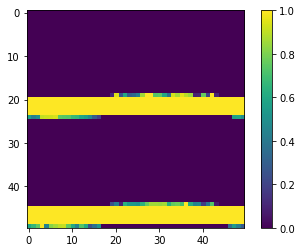

111 0.8532626401594001 2.264631311664147
112 0.8523510138284113 2.264394697914777
113 0.8522700850801007 2.264393438032276


KeyboardInterrupt: 

In [16]:
Qabs = np.inf
fun = lambda dof: fun_Distance(dof,Qabs)
grad_fun = grad(fun)
def fun_nlopt(dof,gradn):
    gradn[:] = grad_fun(dof)
    return fun(dof)

ndof = Nx*Ny
#init = np.ones(ndof)
init = npf.copy(vec)
lb=np.zeros(ndof,dtype=float)
ub=np.ones(ndof,dtype=float)

opt = nlopt.opt(nlopt.LD_MMA, ndof)
opt.set_lower_bounds(lb)
opt.set_upper_bounds(ub)

opt.set_xtol_rel(1e-5)
opt.set_maxeval(100)

opt.set_min_objective(fun_nlopt)
x = opt.optimize(init)